In [151]:
%matplotlib inline
import matplotlib.pyplot as plt
import json
from astropy.io import ascii
import numpy as np
from astropy.table import Table, Column, Row
import sys

In [59]:
results = json.load(open('bandbyband_h11_results.json', 'r'))

In [77]:
results_upper = dict()
for k, v in results.items():
    results_upper[k] = {ki: vi['f_S_upper'] for ki, vi in v.items()}

In [152]:
import pandas as pd
from astropy.time import Time

df = pd.DataFrame(results_upper).transpose()

table = Table([Column(Time([str(i) for i in df.index], format='isot').jd, 'JD'), 
               Column(df['5598'], '5598'), Column(df['7054'], '7054'), 
               Column(df['7087'], '7087'), Column(df['7125'], '7125')])

In [153]:
rows = []
for i, row in enumerate(table): 
    new_row = [row['JD']]
    for name, col in zip(row.colnames, row): 
        if name != 'JD': 
            new_row.append("$<{0}$".format(round(col, 3)))
    rows.append(new_row)

formatted_table = Table(rows=rows, names=row.colnames)

In [193]:
formatted_table.write("h11_allbands.tex", format='latex')

In [194]:
!cat h11_allbands.tex

\begin{table}
\begin{tabular}{ccccc}
JD & 5598 & 7054 & 7087 & 7125 \\
2457854.90557 & $<0.143$ & $<0.187$ & $<0.192$ & $<0.056$ \\
2457854.92122 & $<0.156$ & $<0.183$ & $<0.159$ & $<0.081$ \\
2457854.93687 & $<0.152$ & $<0.185$ & $<0.163$ & $<0.045$ \\
2457854.95271 & $<0.11$ & $<0.187$ & $<0.143$ & $<0.041$ \\
2457854.96838 & $<0.135$ & $<0.202$ & $<0.16$ & $<0.058$ \\
2457854.98403 & $<0.139$ & $<0.186$ & $<0.17$ & $<0.037$ \\
2457916.81118 & $<0.164$ & $<0.197$ & $<0.174$ & $<0.032$ \\
2457916.83378 & $<0.15$ & $<0.167$ & $<0.193$ & $<0.053$ \\
2457916.89373 & $<0.159$ & $<0.18$ & $<0.142$ & $<0.038$ \\
2457916.91633 & $<0.156$ & $<0.196$ & $<0.16$ & $<0.047$ \\
2457916.93719 & $<0.138$ & $<0.173$ & $<0.164$ & $<0.054$ \\
2457924.80896 & $<0.146$ & $<0.185$ & $<0.172$ & $<0.051$ \\
2457924.826 & $<0.125$ & $<0.185$ & $<0.154$ & $<0.041$ \\
2458001.65522 & $<0.199$ & $<0.163$ & $<0.155$ & $<0.078$ \\
2458001.67781 & $<0.139$ & $<0.159$ & $<0.168$ & $<0.189$ \\
2458007.6439 & $<0.128

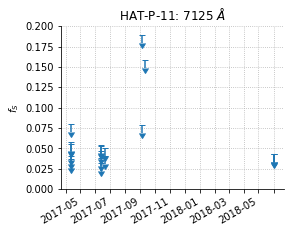

In [192]:
fig, ax = plt.subplots(figsize=(4, 3))

#ax.plot_date(Time(table['JD'], format='jd').plot_date, table['7125'], uplims=True)
ax.errorbar(Time(table['JD'], format='jd').plot_date, table['7125'], yerr=0.01, fmt='_', uplims=True)

import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearsFmt)

plt.setp(ax.get_xticklabels(), rotation=30, ha='right')

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)

for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
    
ax.set(ylabel='$f_S$', title='HAT-P-11: 7125 $\AA$', ylim=[0, 0.2])

ax.grid(ls=':')
fig.savefig('paper_plots/h11_7125.pdf', bbox_inches='tight')